In [1]:
from scipy.linalg import eigh
from openfermion.transforms import get_sparse_operator
from openfermion.utils import pauli_exp_to_qasm, uccsd_singlet_generator, uccsd_singlet_paramsize
from openfermion.ops import QubitOperator
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
from pyscf import ci
from pyscf import mp
from openfermionpyscf import run_pyscf
from openfermion.hamiltonians import MolecularData
from openfermionpsi4 import run_psi4
import os


In [2]:
#menentukan molekul yang akan ditinjau
geometry = [["H", [0, 0, 0]],
            ["H", [0, 0, 0.74]]]
basis = "sto-3g"
multiplicity = 1
charge = 0
molecule = MolecularData(geometry, basis, multiplicity, charge)
h2_molecule = run_pyscf(molecule, run_mp2=True, run_cisd=True, run_ccsd=True, run_fci=True)

In [3]:
import openfermion as of
import openfermionpyscf as ofpyscf


#mendeklarasikan molekul
geometry = [('H', (0.0, 0.0, 0.0)), ('H', (0.0, 0.0, 0.74))]
basis = 'sto-3g'
multiplicity = 1
charge = 0

hamiltonian = ofpyscf.generate_molecular_hamiltonian(
    geometry, basis, multiplicity, charge)

#mengubah bentuk hamilton menjadi bentuk kuantisasi kedua
hamiltonian_ferm_op = of.get_fermion_operator(hamiltonian)

print(hamiltonian_ferm_op)

0.7151043390810812 [] +
-1.2533097866459773 [0^ 0] +
0.3373779634072241 [0^ 0^ 0 0] +
0.09060523100759854 [0^ 0^ 2 2] +
0.3373779634072241 [0^ 1^ 1 0] +
0.09060523100759854 [0^ 1^ 3 2] +
0.09060523100759854 [0^ 2^ 0 2] +
0.3318557006754069 [0^ 2^ 2 0] +
0.09060523100759854 [0^ 3^ 1 2] +
0.3318557006754069 [0^ 3^ 3 0] +
0.3373779634072241 [1^ 0^ 0 1] +
0.09060523100759854 [1^ 0^ 2 3] +
-1.2533097866459773 [1^ 1] +
0.3373779634072241 [1^ 1^ 1 1] +
0.09060523100759854 [1^ 1^ 3 3] +
0.09060523100759854 [1^ 2^ 0 3] +
0.3318557006754069 [1^ 2^ 2 1] +
0.09060523100759854 [1^ 3^ 1 3] +
0.3318557006754069 [1^ 3^ 3 1] +
0.3318557006754069 [2^ 0^ 0 2] +
0.09060523100759854 [2^ 0^ 2 0] +
0.3318557006754069 [2^ 1^ 1 2] +
0.09060523100759854 [2^ 1^ 3 0] +
-0.47506884877217576 [2^ 2] +
0.09060523100759854 [2^ 2^ 0 0] +
0.348825752245232 [2^ 2^ 2 2] +
0.09060523100759854 [2^ 3^ 1 0] +
0.348825752245232 [2^ 3^ 3 2] +
0.3318557006754069 [3^ 0^ 0 3] +
0.09060523100759854 [3^ 0^ 2 1] +
0.3318557006754069 

In [4]:
qubit= h2_molecule.n_qubits
electrons=h2_molecule.n_electrons
print(qubit)
print(electrons)

4
2


In [5]:
hamiltonan=h2_molecule.get_molecular_hamiltonian()
print(hamiltonan)

() 0.7151043390810812
((0, 1), (0, 0)) -1.2533097866459773
((1, 1), (1, 0)) -1.2533097866459773
((2, 1), (2, 0)) -0.47506884877217576
((3, 1), (3, 0)) -0.47506884877217576
((0, 1), (0, 1), (0, 0), (0, 0)) 0.3373779634072241
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09060523100759854
((0, 1), (1, 1), (1, 0), (0, 0)) 0.3373779634072241
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09060523100759854
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09060523100759854
((0, 1), (2, 1), (2, 0), (0, 0)) 0.3318557006754069
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09060523100759854
((0, 1), (3, 1), (3, 0), (0, 0)) 0.3318557006754069
((1, 1), (0, 1), (0, 0), (1, 0)) 0.3373779634072241
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09060523100759854
((1, 1), (1, 1), (1, 0), (1, 0)) 0.3373779634072241
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09060523100759854
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09060523100759854
((1, 1), (2, 1), (2, 0), (1, 0)) 0.3318557006754069
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09060523100759854
((1, 1), (3, 1), (3, 0), (1, 0)) 0.33185

In [8]:
#Transformasi Jordan-Wigner
JW_hamiltonian = jordan_wigner(h2_molecule.get_molecular_hamiltonian())
BK_hamiltonian = bravyi_kitaev(get_fermion_operator(h2_molecule.get_molecular_hamiltonian()))
print("Jordan Wigner=",JW_hamiltonian)
print("Bravyi-Kitaev=",BK_hamiltonian)

Jordan Wigner= -0.09706626816762856 [] +
-0.04530261550379927 [X0 X1 Y2 Y3] +
0.04530261550379927 [X0 Y1 Y2 X3] +
0.04530261550379927 [Y0 X1 X2 Y3] +
-0.04530261550379927 [Y0 Y1 X2 X3] +
0.17141282644776898 [Z0] +
0.16868898170361205 [Z0 Z1] +
0.12062523483390417 [Z0 Z2] +
0.16592785033770344 [Z0 Z3] +
0.17141282644776903 [Z1] +
0.16592785033770344 [Z1 Z2] +
0.12062523483390417 [Z1 Z3] +
-0.22343153690813572 [Z2] +
0.174412876122616 [Z2 Z3] +
-0.22343153690813572 [Z3]
Bravyi-Kitaev= (-0.0970662681676283+0j) [] +
(0.04530261550379927+0j) [X0 Z1 X2] +
(0.04530261550379927+0j) [X0 Z1 X2 Z3] +
(0.04530261550379927+0j) [Y0 Z1 Y2] +
(0.04530261550379927+0j) [Y0 Z1 Y2 Z3] +
(0.17141282644776895+0j) [Z0] +
(0.17141282644776898+0j) [Z0 Z1] +
(0.16592785033770344+0j) [Z0 Z1 Z2] +
(0.16592785033770344+0j) [Z0 Z1 Z2 Z3] +
(0.12062523483390417+0j) [Z0 Z2] +
(0.12062523483390417+0j) [Z0 Z2 Z3] +
(0.16868898170361205+0j) [Z1] +
(-0.22343153690813572+0j) [Z1 Z2 Z3] +
(0.174412876122616+0j) [Z1 Z3] +
(

In [6]:
hamiltonan_fermion=get_fermion_operator(h2_molecule.get_molecular_hamiltonian())
print(hamiltonan_fermion)

0.7151043390810812 [] +
-1.2533097866459773 [0^ 0] +
0.3373779634072241 [0^ 0^ 0 0] +
0.09060523100759854 [0^ 0^ 2 2] +
0.3373779634072241 [0^ 1^ 1 0] +
0.09060523100759854 [0^ 1^ 3 2] +
0.09060523100759854 [0^ 2^ 0 2] +
0.3318557006754069 [0^ 2^ 2 0] +
0.09060523100759854 [0^ 3^ 1 2] +
0.3318557006754069 [0^ 3^ 3 0] +
0.3373779634072241 [1^ 0^ 0 1] +
0.09060523100759854 [1^ 0^ 2 3] +
-1.2533097866459773 [1^ 1] +
0.3373779634072241 [1^ 1^ 1 1] +
0.09060523100759854 [1^ 1^ 3 3] +
0.09060523100759854 [1^ 2^ 0 3] +
0.3318557006754069 [1^ 2^ 2 1] +
0.09060523100759854 [1^ 3^ 1 3] +
0.3318557006754069 [1^ 3^ 3 1] +
0.3318557006754069 [2^ 0^ 0 2] +
0.09060523100759854 [2^ 0^ 2 0] +
0.3318557006754069 [2^ 1^ 1 2] +
0.09060523100759854 [2^ 1^ 3 0] +
-0.47506884877217576 [2^ 2] +
0.09060523100759854 [2^ 2^ 0 0] +
0.348825752245232 [2^ 2^ 2 2] +
0.09060523100759854 [2^ 3^ 1 0] +
0.348825752245232 [2^ 3^ 3 2] +
0.3318557006754069 [3^ 0^ 0 3] +
0.09060523100759854 [3^ 0^ 2 1] +
0.3318557006754069 

In [66]:
h2_matrix=get_sparse_operator(qubit_hamiltonian1).todense()
print(h2_matrix)
print(h2_matrix.shape)

[[ 0.71510434+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.24003549+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.24003549+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.46261815+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.18

In [84]:
a_1=np.array([0,1])
a_2=np.array([0,1])
a_3=np.array([1,0])
a_4=np.array([1,0])
b=np.kron(a_1,a_2)
b_1=np.kron(b,a_3)
b_2=np.kron(b_1,a_4)
b_2t=np.transpose(b_2)
c=np.matmul(h2_matrix,b_2)
d=np.matmul(c,b_2t)
print(d)

[[-1.11675931+0.j]]


In [89]:
h2_matrixb=get_sparse_operator(qubit_hamiltonian2).todense()
c1=np.matmul(h2_matrixb,b_2)
d1=np.matmul(c1,b_2t)
print(d1)
print(h2_matrixb)

[[-0.34956289+0.j]]
[[ 0.71510434+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.24003549+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.46261815+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.18121046+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.24003549+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.

NameError: name 'array_to_bmatrix' is not defined

In [22]:
amplitude=uccsd_singlet_paramsize(qubit,electrons)
print(a)

2


In [27]:
import numpy as np
initial_amplitudes = np.linspace(0,0.05,2)
uccsd=uccsd_singlet_generator(initial_amplitudes,qubit,electrons)


-0.05 [0^ 2 1^ 3] +
-0.05 [1^ 3 0^ 2] +
0.05 [2^ 0 3^ 1] +
0.05 [3^ 1 2^ 0]


In [41]:
from pyquil.quil import Program
from forestopenfermion import exponentiate
from pyquil.api import QVMConnection

pyquil_program = exponentiate(qubit_hamiltonian1)
#print(pyquil_program)

qvm = QVMConnection()
wf = qvm.wavefunction(pyquil_program)
print(wf.amplitudes)


[ 7.55024831e-01-6.55696199e-01j -2.45326947e-17-1.96261557e-17j
 -2.77555756e-17-1.38777878e-17j -4.62223187e-33+4.90653893e-18j
  3.92523115e-17+5.88784672e-17j  4.90653893e-18-1.54074396e-33j
  0.00000000e+00-1.38777878e-17j  1.96261557e-17+3.43457725e-17j
 -5.55111512e-17-5.55111512e-17j -3.43457725e-17+0.00000000e+00j
 -2.77555756e-17+4.16333634e-17j  1.96261557e-17-4.90653893e-18j
  3.92523115e-17-5.88784672e-17j -2.45326947e-17+1.96261557e-17j
  1.11022302e-16+9.71445147e-17j  3.92523115e-17-1.12850395e-16j]
X 0
PHASE(0.09706626816762856) 0
X 0
PHASE(0.09706626816762856) 0
RZ(0.342825652895538) 0
RZ(0.34282565289553796) 1
RZ(-0.4468630738162712) 2
RZ(-0.4468630738162712) 3
CNOT 0 1
RZ(0.33737796340722415) 1
CNOT 0 1
CNOT 0 2
RZ(0.24125046966780833) 2
CNOT 0 2
CNOT 0 3
RZ(0.3318557006754068) 3
CNOT 0 3
CNOT 1 2
RZ(0.3318557006754068) 2
CNOT 1 2
CNOT 1 3
RZ(0.24125046966780833) 3
CNOT 1 3
CNOT 2 3
RZ(0.34882575224523177) 3
CNOT 2 3
H 0
H 1
RX(pi/2) 2
RX(pi/2) 3
CNOT 0 1
CNOT 1 2
C

In [43]:
from pyquil import Program, get_qc
qc = get_qc("9q-square-qvm")

In [46]:
bitstrings = qc.run_and_measure(pyquil_program, trials=10)

In [47]:
print(np.mean(bitstrings[0]))

0.0


In [48]:
from pyquil import Program, get_qc
from pyquil.gates import *

def ansatz(theta):
    program = Program()
    program += RY(theta, 0)
    return program

print(ansatz(theta=0.2))


RY(0.2) 0



In [54]:
import numpy as np
#qc = get_qc("9q-square-qvm")

thetas = np.linspace(0, 2*np.pi, 21)
results = []
for theta in thetas:
    program = ansatz(theta)
    bitstrings = qc.run_and_measure(program, trials=1000)
    results.append(np.mean(bitstrings[0]))

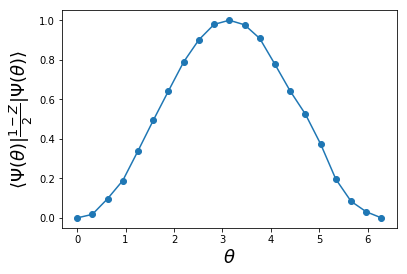

In [55]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(thetas, results, 'o-')
plt.xlabel(r'$\theta$', fontsize=18)
_ = plt.ylabel(r'$\langle \Psi(\theta) | \frac{1 - Z}{2} | \Psi(\theta) \rangle$',
               fontsize=18)


In [57]:
from pyquil import Program
from pyquil.gates import *
awal= Program(
    X(0),
    X(1),
)
print(awal)

X 0
X 1



In [58]:
b=qvm.wavefunction(awal)

In [59]:
print(b)

(1+0j)|11>


In [ ]:
for observable in [z0, z1, xor]